# EDA Testing
Examples of the library ThreeDLabels

In [1]:
import numpy as np
import nibabel as nib
from ThreeDLabeler.preprocessing import tag_parser
from ThreeDLabeler.images import Image
from ThreeDLabeler.plotting import mri_point_plot
import matplotlib.pyplot as plt

In [2]:
img475 = nib.load("MouseSkullData/475.mnc")

In [3]:
points475 = tag_parser("MouseSkullData/475_landmarks.tag")

In [4]:
img475 = Image(img475.get_data(), img475.header.get_zooms(), points475)

In [5]:
img475.cube()

In [ ]:
img475.scale(128)

In [ ]:
mri_point_plot(img475.voxels, img475.point_positon)

In [ ]:
mri_point_plot(img475.voxels, img475.point_positon, 2)

In [ ]:
mri_point_plot(img475.voxels, img475.point_positon, 0)

73


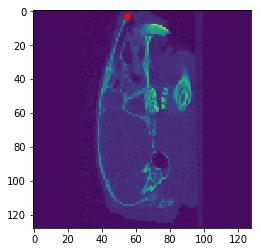

In [23]:
im_slice = int(np.round(img475.point_positon[2, 0]))
print(im_slice)
plt.imshow(img475.voxels[ :, :, im_slice])
plt.plot(img475.point_positon[2,1], img475.point_positon[2,2], 'ro')
plt.show()

55


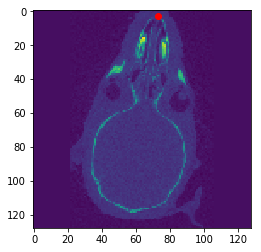

In [17]:
im_slice = int(np.round(img475.point_positon[2, 1]))
print(im_slice)

plt.imshow(img475.voxels[:, im_slice, :])
plt.plot(img475.point_positon[2,0], img475.point_positon[2,2], 'ro')
plt.show()

3


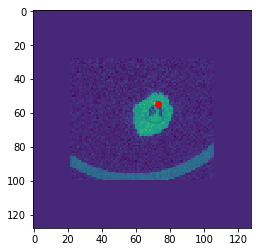

In [24]:
im_slice = int(np.round(img475.point_positon[2, 2]))
print(im_slice)
plt.imshow(img475.voxels[im_slice, :,:])
plt.plot(img475.point_positon[2,0], img475.point_positon[2,1], 'ro')
plt.show()

In [13]:

import numpy as np
import ipywidgets as ipyw
import matplotlib.pyplot as plt
%matplotlib inline

class ImageSliceViewer3D:
    """ 
    ImageSliceViewer3D is for viewing volumetric image slices in jupyter or
    ipython notebooks. 
    
    User can interactively change the slice plane selection for the image and 
    the slice plane being viewed. 

    Argumentss:
    Volume = 3D input image
    figsize = default(8,8), to set the size of the figure
    cmap = default('plasma'), string for the matplotlib colormap. You can find 
    more matplotlib colormaps on the following link:
    https://matplotlib.org/users/colormaps.html
    
    """
    
    def __init__(self, volume, figsize=(8,8), points=None cmap='plasma'):
        self.volume = volume
        self.figsize = figsize
        self.cmap = cmap
        self.v = [np.min(volume), np.max(volume)]
        
        # Call to select slice plane
        ipyw.interact(self.view_selection, view=ipyw.RadioButtons(
            options=['x-y','y-z', 'z-x'], value='x-y', 
            description='Slice plane selection:', disabled=False,
            style={'description_width': 'initial'}))
    
    def view_selection(self, view):
        # Transpose the volume to orient according to the slice plane selection
        orient = {"y-z":[1,2,0], "z-x":[2,0,1], "x-y": [0,1,2]}
        self.vol = np.transpose(self.volume, orient[view])
        maxZ = self.vol.shape[2] - 1
        
        # Call to view a slice within the selected slice plane
        ipyw.interact(self.plot_slice, 
            z=ipyw.IntSlider(min=0, max=maxZ, step=1, continuous_update=False, 
            description='Image Slice:'))
        
    def plot_slice(self, z):
        # Plot slice for the given plane and slice
        self.fig = plt.figure(figsize=self.figsize)
        plt.imshow(self.vol[:,:,z], cmap=plt.get_cmap(self.cmap), 
            vmin=self.v[0], vmax=self.v[1])


        
# Create a 3D array with random numbers
x = np.random.rand(256,256,96)

ImageSliceViewer3D(x)


interactive(children=(RadioButtons(description='Slice plane selection:', options=('x-y', 'y-z', 'z-x'), style=…

In [22]:
ImageSliceViewer3D(img475.voxels);

interactive(children=(RadioButtons(description='Slice plane selection:', options=('x-y', 'y-z', 'z-x'), style=…

In [16]:
img475.point_positon

array([[93.72128554, 64.62488867, 78.29081675],
       [74.94080045, 77.43273271, 42.4589478 ],
       [73.18021476, 54.75456952,  2.9918057 ],
       [57.93070713, 76.89747713, 40.19802373],
       [32.30008131, 61.37054061, 71.65683242]])

In [18]:
None == None

True

In [21]:
from google.cloud import firestore

# Project ID is determined by the GCLOUD_PROJECT environment variable
db = firestore.Client()

DefaultCredentialsError: Could not automatically determine credentials. Please set GOOGLE_APPLICATION_CREDENTIALS or explicitly create credentials and re-run the application. For more information, please see https://cloud.google.com/docs/authentication/getting-started

In [20]:
!pwd

/home/kailukowiak/DataScienceProjects/3DLabeler
